# **INTRODUCTION**

# ML engineering vs. data science

In industry, there is quite a bit of overlap between machine learning engineering and data science. Both jobs involve working with data, such as data analysis and data preprocessing.

The main task for machine learning engineers is to first analyze the data for viable trends, then create an efficient input pipeline for training a model. This process involves using libraries like NumPy and pandas for handling data, along with machine learning frameworks like TensorFlow for creating the model and input pipeline.

While the NumPy and pandas libraries are also used in data science, the Data Preprocessing section will cover one of the core libraries that is specific to industry-level data science: scikit-learn. Data scientists tend to work on smaller datasets than machine learning engineers, and their main goal is to analyze the data and quickly extract usable results. Therefore, they focus more on traditional data inference models (found in scikit-learn), rather than deep neural networks.

# **STANDARDIZING DATA**

In [ ]:
# A- Standard Data format

Data can contain all sorts of different values. For example, Olympic 100m sprint times will range from 9.5 to 10.5 seconds, while calorie counts in large pepperoni pizzas can range from 1500 to 3000 calories. Even data measuring the exact same quantities can range in value (e.g. weight in kilograms vs. weight in pounds).

When data can take on any range of values, it makes it difficult to interpret. Therefore, data scientists will convert the data into a standard format to make it easier to understand. The standard format refers to data that has 0 mean and unit variance (i.e. standard deviation = 1), and the process of converting data into this format is called data standardization.

Data standardization is a relatively simple process. For each data value, x, we subtract the overall mean of the data, μ, then divide by the overall standard deviation, σ. The new value, z, represents the standardized data value. Thus, the formula for data standardization is:

z = (x - μ) / σ
​

In [2]:
# imports
import numpy as np

In [ ]:
# B- NumPy and scikit-learn
# define pizza_data
pizza_data = np.array([[2100,   10,  800],
                       [2500,   11,  850],
                       [1800,   10,  760],
                       [2000,   12,  800],
                       [2300,   11,  810]])

print('{}\n'.format(repr(pizza_data)))
print('{}\n'.format(pizza_data.sum()))

# import scale from sklearn.preprocessing
from sklearn.preprocessing import scale

# standardizing each column of pizza_data
col_standardized = scale(pizza_data)
print('{}\n'.format(repr(col_standardized)))

# column means (rounded to nearest tousandth)
col_means = col_standardized.mean(axis=0).round(decimals=3)
print('{}\n'.format(repr(col_means)))

# column standard deviations
col_stds = col_standardized.std(axis=0)
print('{}\n'.format(repr(col_stds)))

array([[2100,   10,  800],
       [2500,   11,  850],
       [1800,   10,  760],
       [2000,   12,  800],
       [2300,   11,  810]])

14774

array([[-0.16552118, -1.06904497, -0.1393466 ],
       [ 1.4896906 ,  0.26726124,  1.60248593],
       [-1.40693001, -1.06904497, -1.53281263],
       [-0.57932412,  1.60356745, -0.1393466 ],
       [ 0.66208471,  0.26726124,  0.2090199 ]])

array([ 0., -0.,  0.])

array([1., 1., 1.])



# **DATA RANGE**

In [ ]:
# A- Range scaling

# To scale a data by compressing it into a fixed range. 
# one of the biggest use cases for this is compressig data into the range [0, 1].
# helps to view data in terms of porportions, or percentages based on maximum and minimum valuesin data.
# the formula for scaling based on a range is. a two-step process. for a given data value x,
# we first compute the porportion of the value with respect to the min and max of the data
# like:  Xprop = (X - Dmin) / (Dmax - Dmin)
# we compute the proportion of the data value Xprop !!!!(works only if Dmin != Dmax)
# then we use proprotion to scale to the range [Rmin, Rmax].
# the formula to do that is: Xscale = Xprop * (Rmax - Rmin) + Rmin

In [ ]:
# B- Range compression in scikit-learn

# define data
data = np.array([[ 1.2,  3.2],
                 [-0.3, -1.2],
                 [ 6.5, 10.1],
                 [ 2.2, -8.4]])

print('{}\n'.format(repr(data)))

# import MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# default scaler range is [0, 1]
default_scaler = MinMaxScaler()
transformed = default_scaler.fit_transform(data)
print('{}\n'.format(repr(transformed)))

# custom Scaler, example range [-2, 3]
custom_scaler = MinMaxScaler(feature_range=(-2, 3))
transformed = custom_scaler.fit_transform(data)
print('{}\n'.format(repr(transformed)))

array([[ 1.2,  3.2],
       [-0.3, -1.2],
       [ 6.5, 10.1],
       [ 2.2, -8.4]])

array([[0.22058824, 0.62702703],
       [0.        , 0.38918919],
       [1.        , 1.        ],
       [0.36764706, 0.        ]])

array([[-0.89705882,  1.13513514],
       [-2.        , -0.05405405],
       [ 3.        ,  3.        ],
       [-0.16176471, -2.        ]])



In [ ]:
# define new_data
new_data = np.array([[ 1.2, -0.5],
                     [ 5.3,  2.3],
                     [-3.3,  4.1]])

print('{}\n'.format(repr(new_data)))

# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

default_scaler = MinMaxScaler()
transformed = default_scaler.fit_transform(new_data)
print('{}\n'.format(repr(transformed)))

# new instance of MinMaxScaler
default_scaler = MinMaxScaler()
# different data value fit
default_scaler.fit(data)
transformed = default_scaler.transform(new_data)
print('{}\n'.format(repr(transformed)))


array([[ 1.2, -0.5],
       [ 5.3,  2.3],
       [-3.3,  4.1]])

array([[0.52325581, 0.        ],
       [1.        , 0.60869565],
       [0.        , 1.        ]])

array([[ 0.22058824,  0.42702703],
       [ 0.82352941,  0.57837838],
       [-0.44117647,  0.67567568]])



# **ROBUST SCALING**

In [ ]:
# the goal is to learn how to scale data without being affected by outliers

# A- Data Outliers

# An important aspect of data that we have to deal with is outliers.
# In general terms, an outlier is a data point that is significantly further away from the other data points.
# For example, if we had watermelons of weights 5, 4, 6, 7, and 20 pounds, the 20 pound watermelon is an outlier.


# We can robustly scale the data, i.e. avoid being affected by outliers,
# by using use the data's median and Interquartile Range (IQR).
# Since the median and IQR are percentile measurements of the data (50% for median, 25% to 75% for the IQR),
# they are not affected by outliers. For the scaling method,
# we just subtract the median from each data value then scale to the IQR.

In [ ]:
# B- Robust scaling with scikit-learn

# define data
data = np.array([[ 1.2,  2.3],
       [ 2.1,  4.2],
       [-1.9,  3.1],
       [-2.5,  2.5],
       [ 0.8,  3. ],
       [ 6.3,  2.1],
       [-1.5,  2.7],
       [ 1.4,  2.9],
       [ 1.8,  3.2]])
print('{}\n'.format(repr(data)))

# import RobustScaler from sklearn.preprocessing
from sklearn.preprocessing import RobustScaler

# initialize a robust_scaler
robust_scaler = RobustScaler()
transformed = robust_scaler.fit_transform(data)

print('{}\n'.format(repr(transformed)))

array([[ 1.2,  2.3],
       [ 2.1,  4.2],
       [-1.9,  3.1],
       [-2.5,  2.5],
       [ 0.8,  3. ],
       [ 6.3,  2.1],
       [-1.5,  2.7],
       [ 1.4,  2.9],
       [ 1.8,  3.2]])

array([[ 0.        , -1.        ],
       [ 0.27272727,  2.16666667],
       [-0.93939394,  0.33333333],
       [-1.12121212, -0.66666667],
       [-0.12121212,  0.16666667],
       [ 1.54545455, -1.33333333],
       [-0.81818182, -0.33333333],
       [ 0.06060606,  0.        ],
       [ 0.18181818,  0.5       ]])



# **NORMALIZING DATA**

In [ ]:
# L2 Normalization


Formula for L2 Normalization is: 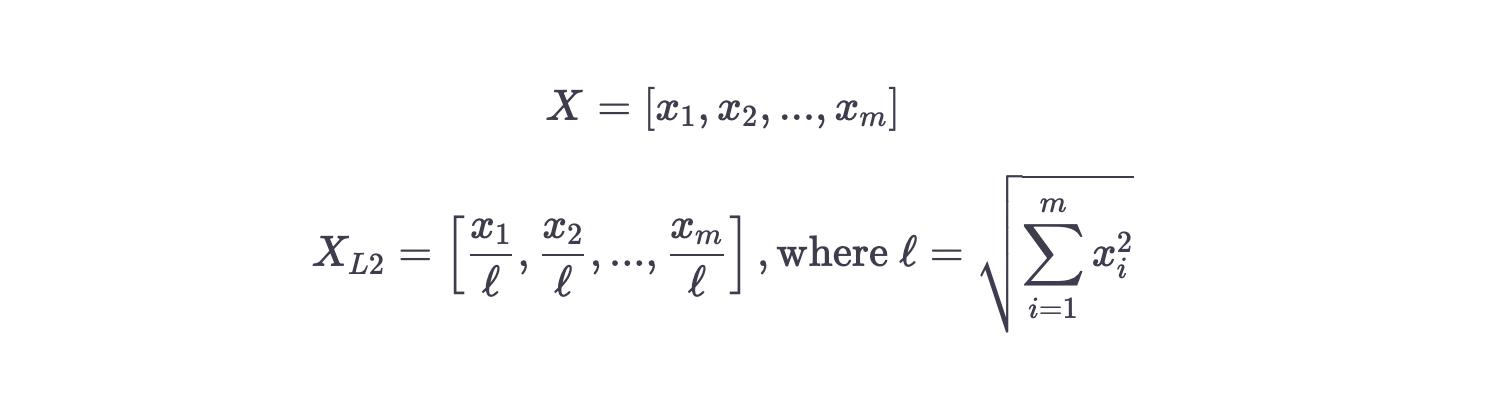

In [6]:
# define data
data = np.array([[4, 1, 2, 2],
                 [3, 4, 0, 0],
                 [7, 5, 9, 2]])

print('{}\n'.format(repr(data)))

from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
transformed = normalizer.fit_transform(data)
print('{}\n'.format(repr(transformed)))

array([[4, 1, 2, 2],
       [3, 4, 0, 0],
       [7, 5, 9, 2]])

array([[0.8       , 0.2       , 0.4       , 0.4       ],
       [0.6       , 0.8       , 0.        , 0.        ],
       [0.55513611, 0.39652579, 0.71374643, 0.15861032]])



# **DATA IMPUTATION**

In [15]:
# A- Data imputation methods

# define data
data = np.array([[ 1.,  2., np.NaN,  2.],
                 [ 5., np.NaN,  1.,  2.],
                 [ 4., np.NaN,  3., np.NaN],
                 [ 5.,  6.,  8.,  1.],
                 [np.NaN,  7., np.NaN,  0.]])

print('{}\n'.format(repr(data)))
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer()
transformed = imp_mean.fit_transform(data)
print('{}\n'.format(repr(transformed)))

array([[ 1.,  2., nan,  2.],
       [ 5., nan,  1.,  2.],
       [ 4., nan,  3., nan],
       [ 5.,  6.,  8.,  1.],
       [nan,  7., nan,  0.]])

array([[1.  , 2.  , 4.  , 2.  ],
       [5.  , 5.  , 1.  , 2.  ],
       [4.  , 5.  , 3.  , 1.25],
       [5.  , 6.  , 8.  , 1.  ],
       [3.75, 7.  , 4.  , 0.  ]])



In [16]:
# define data
data = np.array([[ 1.,  2., np.NAN,  2.],
                 [ 5., np.NAN,  1.,  2.],
                 [ 4., np.NAN,  3., np.NAN],
                 [ 5.,  6.,  8.,  1.],
                 [np.NAN,  7., np.NAN,  0.]])

print('{}\n'.format(repr(data)))

from sklearn.impute import SimpleImputer

# this method replace nan with the median of the column
imp_median = SimpleImputer(strategy='median')
transformed = imp_median.fit_transform(data)
print('{}\n'.format(repr(transformed)))

# this method replace nan with the most frequent value in the column
imp_frequent = SimpleImputer(strategy='most_frequent')
transformed = imp_frequent.fit_transform(data)
print('{}\n'.format(repr(transformed)))

array([[ 1.,  2., nan,  2.],
       [ 5., nan,  1.,  2.],
       [ 4., nan,  3., nan],
       [ 5.,  6.,  8.,  1.],
       [nan,  7., nan,  0.]])

array([[1. , 2. , 3. , 2. ],
       [5. , 6. , 1. , 2. ],
       [4. , 6. , 3. , 1.5],
       [5. , 6. , 8. , 1. ],
       [4.5, 7. , 3. , 0. ]])

array([[1., 2., 1., 2.],
       [5., 2., 1., 2.],
       [4., 2., 3., 2.],
       [5., 6., 8., 1.],
       [5., 7., 1., 0.]])



In [18]:
# fill_value
data = np.array([[ 1.,  2., np.NAN,  2.],
                 [ 5., np.NAN,  1.,  2.],
                 [ 4., np.NAN,  3., np.NAN],
                 [ 5.,  6.,  8.,  1.],
                 [np.NAN,  7., np.NAN,  0.]])

print('{}\n'.format(repr(data)))

from sklearn.impute import SimpleImputer
imp_constant = SimpleImputer(strategy='constant', fill_value=1)

transformed = imp_constant.fit_transform(data)
print('{}\n'.format(repr(transformed)))

array([[ 1.,  2., nan,  2.],
       [ 5., nan,  1.,  2.],
       [ 4., nan,  3., nan],
       [ 5.,  6.,  8.,  1.],
       [nan,  7., nan,  0.]])

array([[1., 2., 1., 2.],
       [5., 1., 1., 2.],
       [4., 1., 3., 1.],
       [5., 6., 8., 1.],
       [1., 7., 1., 0.]])



In [ ]:
# B- Other imputation methods


The SimpleImputer object only implements the four imputation methods shown in section A. However, data imputation is not limited to those four methods.

There are also more advanced imputation methods such as k-Nearest Neighbors (filling in missing values based on similarity scores from the kNN algorithm) and MICE (applying multiple chained imputations, assuming the missing values are randomly distributed across observations).

In most industry cases these advanced methods are not required, since the data is either perfectly cleaned or the missing values are scarce. Nevertheless, the advanced methods could be useful when dealing with open source datasets, since these tend to be more incomplete.

# **PCA** (Principal Component Analysis)

In [ ]:
# A- Dimensionality reduction

# PCA extracts the principal components of the dataset,
# which are an uncorrelated set of latent variables that encompass most of the information from the original dataset.
# Using a smaller set of principal components can make it a lot easier
# to use the dataset in statistical or machine learning models
# (especially when the original dataset contains many correlated features).

In [20]:
# B- PCA in scikit-learn

# define data
data = np.array([[ 1.5,  3. ,  9. , -0.5,  1. ],
                 [ 2.2,  4.3,  3.5,  0.6,  2.7],
                 [ 3. ,  6.1,  1.1,  1.2,  4.2],
                 [ 8. , 16. ,  7.7, -1. ,  7.1]])

print('{}\n'.format(repr(data)))

from sklearn.decomposition import PCA
pca_obj = PCA()       # the value of n_component will be 4. As m 5 and default is always m-1
pc = pca_obj.fit_transform(data).round(3)
print('{}\n'.format(repr(pc)))

pca_obj = PCA(n_components=3)
pc = pca_obj.fit_transform(data).round(3)
print('{}\n'.format(repr(pc)))

pca_obj = PCA(n_components=2)
pc = pca_obj.fit_transform(data).round(3)
print('{}\n'.format(repr(pc)))

array([[ 1.5,  3. ,  9. , -0.5,  1. ],
       [ 2.2,  4.3,  3.5,  0.6,  2.7],
       [ 3. ,  6.1,  1.1,  1.2,  4.2],
       [ 8. , 16. ,  7.7, -1. ,  7.1]])

array([[-4.8600e+00,  4.6300e+00, -4.7000e-02,  0.0000e+00],
       [-3.7990e+00, -1.3180e+00,  1.2700e-01,  0.0000e+00],
       [-1.8630e+00, -4.2260e+00, -8.9000e-02,  0.0000e+00],
       [ 1.0522e+01,  9.1400e-01,  9.0000e-03,  0.0000e+00]])

array([[-4.8600e+00,  4.6300e+00, -4.7000e-02],
       [-3.7990e+00, -1.3180e+00,  1.2700e-01],
       [-1.8630e+00, -4.2260e+00, -8.9000e-02],
       [ 1.0522e+01,  9.1400e-01,  9.0000e-03]])

array([[-4.86 ,  4.63 ],
       [-3.799, -1.318],
       [-1.863, -4.226],
       [10.522,  0.914]])



# **LABELED DATA**

In [25]:
# A- Class labels

from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
print('{}\n'.format(repr(bc)))
print('Data shape: {}\n'.format(bc.data.shape))

# Class labels
print('{}\n'.format(repr(bc.target)))
print('Labels Shape: {}\n'.format(bc.target.shape))

# Labels names
print('{}\n'.format(list(bc.target_names)))

milgnant = bc.data[bc.target == 0]
print('Milgnant shape: {}\n'.format(milgnant.shape))

benign = bc.data[bc.target == 1]
print('Benign shape: {}\n'.format(benign.shape))

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 